In [ ]:
import pandas as pd
from datetime import datetime
import time
import requests
# while True:
# ping = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/%5ENSEI?range=3d&interval=1m').json()
# close = ping['chart']['result'][0]['indicators']['quote'][0]['close']
# timestamp = ping['chart']['result'][0]['timestamp']
# data_1 = pd.DataFrame({'Close': close, 'Time':timestamp})
# data_1['Time_b'] = [datetime.fromtimestamp(x) for x in data_1['Time']]
# data_1.drop('Time', axis=1,inplace=True)
# data_1.set_index('Time_b',inplace=True)

In [ ]:
!lscpu |grep 'Model name'
!lscpu | grep 'Socket(s):'
!lscpu | grep 'Core(s) per socket:'
!lscpu | grep 'Thread(s) per core'
!lscpu | grep "L3 cache" 
!lscpu | grep "MHz"
# !df -h / | awk '{print $4}'

Model name:          AMD EPYC 7B12
Socket(s):           1
Core(s) per socket:  1
Thread(s) per core:  2
L3 cache:            16384K
CPU MHz:             2249.998


In [ ]:
data_1=pd.read_csv('FB_2 .csv')

In [ ]:
len(data_1)
print(data_1)

                  Time_b       Close
0    2020-07-22 13:30:00  239.479996
1    2020-07-22 13:31:00  239.949997
2    2020-07-22 13:32:00  240.695404
3    2020-07-22 13:33:00  241.410004
4    2020-07-22 13:34:00  240.919693
..                   ...         ...
385  2020-07-22 19:55:00  239.761597
386  2020-07-22 19:56:00  239.830002
387  2020-07-22 19:57:00  239.899994
388  2020-07-22 19:58:00  239.869995
389  2020-07-22 19:59:00  239.802704

[390 rows x 2 columns]


In [ ]:
# data_1 = data_1[:-1170]
# data_1 = data_1[:-780]

In [ ]:
print(len(data_1))
print(data_1)
# data_1.to_csv('NSEI_2.csv', index=True)

390
                  Time_b       Close
0    2020-07-22 13:30:00  239.479996
1    2020-07-22 13:31:00  239.949997
2    2020-07-22 13:32:00  240.695404
3    2020-07-22 13:33:00  241.410004
4    2020-07-22 13:34:00  240.919693
..                   ...         ...
385  2020-07-22 19:55:00  239.761597
386  2020-07-22 19:56:00  239.830002
387  2020-07-22 19:57:00  239.899994
388  2020-07-22 19:58:00  239.869995
389  2020-07-22 19:59:00  239.802704

[390 rows x 2 columns]


In [ ]:
# data_1=pd.read_csv("data_1.csv")
# data_1.head()

In [ ]:
# dataset['TimeStamp'] = pd.Series([val.time() for val in dataset['TimeStamp']])

In [ ]:
# if len(data_1)%15==0:   #condition

In [ ]:
 
data_1=data_1.reset_index()
# data_1=data_1.iloc[-100:]
# data_1 = data_1.reset_index(drop=True)

In [ ]:
print(data_1)

     index               Time_b       Close
0        0  2020-07-22 13:30:00  239.479996
1        1  2020-07-22 13:31:00  239.949997
2        2  2020-07-22 13:32:00  240.695404
3        3  2020-07-22 13:33:00  241.410004
4        4  2020-07-22 13:34:00  240.919693
..     ...                  ...         ...
385    385  2020-07-22 19:55:00  239.761597
386    386  2020-07-22 19:56:00  239.830002
387    387  2020-07-22 19:57:00  239.899994
388    388  2020-07-22 19:58:00  239.869995
389    389  2020-07-22 19:59:00  239.802704

[390 rows x 3 columns]


In [ ]:
import numpy as np
from google.colab import files
# data_to_load = files.upload()

Load the required files before proceeding further:

In [ ]:
import pandas as pd
import io
# df = pd.read_csv('DJI.csv')
df = data_1

In [ ]:
# !unzip file.zip

In [ ]:
%tensorflow_version 1.x
import helpermethods
import tensorflow as tf
import numpy as np
import sys
import os
from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

TensorFlow 1.x selected.


In [ ]:
print(tf.__version__)

1.15.2


In [ ]:
#Import keras grnn
from rnn import FastGRNNCellKeras, FastRNNCellKeras

Data Preprocessing

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 

In [ ]:
print(len(df))
df = df[df['Close'].notna()]
print(len(df))

390
389


In [ ]:
data = pd.DataFrame()
data['Close']=df['Close']

In [ ]:
count_nan = len(df) - df.count()
print(count_nan)

index     0
Time_b    0
Close     0
dtype: int64


In [ ]:
print(data)

          Close
0    239.479996
1    239.949997
2    240.695404
3    241.410004
4    240.919693
..          ...
385  239.761597
386  239.830002
387  239.899994
388  239.869995
389  239.802704

[389 rows x 1 columns]


In [ ]:

#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
# training_data_len = math.ceil( len(dataset) *.6)
training_data_len = math.ceil( len(dataset)- 50) 



#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(10,len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])


#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)    


#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# print(x_train)

In [ ]:

#Test data set
test_data = scaled_data[training_data_len - 10: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])



#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# x_test

In [ ]:
# dataDimension = int(x_train.shape[1]) - 1
dataDimension = int(x_train.shape[1]) 
print(dataDimension)

10


In [ ]:
cell = "FastRNN" # Choose between FastGRNN, FastRNN  ###, UGRNN, GRU and LSTM
 
inputDims = 10 #features taken in by RNN in one timestep
hiddenDims = 50 #hidden state of RNN
 
totalEpochs = 40
batchSize = 10
 
learningRate = 0.001 #Change to 0.001,0.002,0.003 if -ve value of r^2 is obtained
decayStep = 50
decayRate = 0.1
 
outFile = None #provide your file, if you need all the logging info in a file
 
#low-rank parameterisation for weight matrices. None => Full Rank
wRank = None 
uRank = None 
 
# Sparsity of the weight matrices. x => 100*x % are non-zeros
# Note: Sparsity inducing is not supported in this code. 
sW = 1.0 
sU = 1.0
 
#Non-linearities for the RNN architecture. Can choose from "tanh, sigmoid, relu, quantTanh, quantSigm"
update_non_linearity = "relu"
gate_non_linearity = "relu"

In [ ]:
assert dataDimension % inputDims == 0, "Infeasible per step input, Timesteps have to be integer"


In [ ]:
cell == "FastRNN"
FastCell = FastRNNCellKeras(hiddenDims, #gate_non_linearity=gate_non_linearity,
                        update_non_linearity=update_non_linearity,
                        wRank=wRank, uRank=uRank)
# FastCell_1 = FastGRNNCellKeras(hiddenDims)
# FastCell_2 = FastGRNNCellKeras(hiddenDims)



In [ ]:
from tensorflow.keras import layers


In [ ]:
# print(tf.keras.__version__)

Create Model

In [ ]:
x = inputs = Input(shape=[int(dataDimension / inputDims), inputDims], name='input')
layer_shape = K.int_shape(x)#x.get_shape()
print(layer_shape)
x = RNN(FastCell, return_sequences=False, name='rnn')(x)
#x = RNN(FastCell_1, return_sequences=True, name='rnn1')(x)


out = Dense(1, activation='relu', name='dense')(x)
model = Model(inputs=inputs, outputs=out)
Adam_ = Adam(lr=0.01)
# model.compile(optimizer=Adam_, loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer=Adam_, loss='mean_squared_error', metrics=['accuracy'])

model.summary()

(None, 1, 10)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1, 10)]           0         
_________________________________________________________________
rnn (RNN)                    (None, 50)                3052      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 3,103
Trainable params: 3,103
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(x_train.shape)
x_train = np.reshape(x_train,[x_train.shape[0],1,10])
print(x_test.shape)
x_test = np.reshape(x_test,[x_test.shape[0],1,10])
print(x_train.shape)
print(x_test.shape)

(329, 10, 1)
(50, 10, 1)
(329, 1, 10)
(50, 1, 10)


In [ ]:
# print(x_train)
# print(x_test)

In [ ]:
import time
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("model_history_log_fastrnn.csv", append=True)
# model.fit_generator(...,callbacks=[csv_logger])


Using TensorFlow backend.


In [ ]:
start = time.time()
model.fit(x_train, y_train, batchSize, epochs=totalEpochs, validation_data=(x_test, scaled_data[training_data_len : , : ]), callbacks=[csv_logger])
stop = time.time()
print(f"Training time: {stop - start}s")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 329 samples, validate on 50 samples
Epoch 1/40
329/329 [==============================] - 0s 878us/sample - loss: 0.0271 - acc: 0.0122 - val_loss: 0.0049 - val_acc: 0.0000e+00
Epoch 2/40
329/329 [==============================] - 0s 212us/sample - loss: 0.0069 - acc: 0.0122 - val_loss: 0.0058 - val_acc: 0.0000e+00
Epoch 3/40
329/329 [==============================] - 0s 184us/sample - loss: 0.0056 - acc: 0.0122 - val_loss: 0.0055 - val_acc: 0.0000e+00
Epoch 4/40
329/329 [==============================] - 0s 227us/sample - loss: 0.0056 - acc: 0.0122 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 5/40
329/329 [==============================] - 0s 199us/sample - loss: 0.0045 - acc: 0.0122 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 6/40
329/329 [==============================] - 0s 195us/sample - loss: 0.0043 - acc: 0.0122 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 7/40
329/329 [=

In [ ]:
performance_log_fastrnn=pd.read_csv('model_history_log_fastrnn.csv')
# print(performance_log_fastrnn)
# del performance_log_fastrnn['acc']
# del performance_log_fastrnn['val_acc']
# del performance_log_fastrnn['val_loss']

In [ ]:
# print(performance_log_fastrnn)

In [ ]:
# print(performance_log_fastrnn)

In [ ]:
time_fastrnn= stop-start
print(time_fastrnn)

3.44767165184021


In [ ]:
# len(y_test)
# print(performance_log_fastrnn)


Finding MSE


In [ ]:
# print(len(test_data[60:,:]))
# print(scaled_data[training_data_len : , : ])

In [ ]:
# Getting the models predicted price values
 
predictions_fastgrnn = model.predict(x_test)
predictions_fastgrnn = scaler.inverse_transform(predictions_fastgrnn)#Undo scaling
#Calculate/Get the value of RMSE

# mse_fastgrnn= mean_squared_error(scaled_data[training_data_len : , : ], predictions_fastgrnn )
# rmse_fastgrnn = math.sqrt(mse_fastgrnn)

mse_fastgrnn= mean_squared_error(y_test, predictions_fastgrnn )
rmse_fastgrnn = math.sqrt(mse_fastgrnn)
print(rmse_fastgrnn)


0.16037204461483348


In [ ]:
from sklearn.metrics import r2_score

cod_fastrnn = r2_score(y_test, predictions_fastgrnn)
print(cod_fastrnn)

0.8075154715089771


In [ ]:
# predictions_fastgrnn = model.predict(x_test)
# predictions_fastgrnn = scaler.inverse_transform(predictions_fastgrnn)#Undo scaling
# # print(predictions_fastgrnn)

In [ ]:
# len(predictions_fastgrnn)

################# FB Prophet ##################

In [ ]:
from fbprophet import Prophet

In [ ]:
# #creating dataframe

# df_fb = df[df['Close'].notna()]
df_fb=df
print(len(df_fb))
# count_nan = len(df_fb) - df_fb.count()
# print(count_nan)

389


In [ ]:
# print(df_fb)

In [ ]:
# df_fb = df_fb[df_fb['Date'].notna()]
# df_fb = df_fb[pd.notnull(df_fb['Date'])]
print(len(df_fb))


389


In [ ]:
df_fb['Time_b'] = pd.to_datetime(df_fb.Time_b,format='%Y-%m-%d')
df_fb.index = df_fb['Time_b']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#preparing data
df_fb.rename(columns={'Close': 'y', 'Time_b': 'ds'}, inplace=True)

#train and validation
train_fb = df_fb[:training_data_len]
valid_fb = df_fb[training_data_len:]

#fit the model
model_fb = Prophet(daily_seasonality=True)#,yearly_seasonality=True)


start_fb=time.time()
model_fb.fit(train_fb)
stop_fb = time.time()
print(f"Training time: {stop_fb - start_fb}s")



#predictions
close_prices_fb = model_fb.make_future_dataframe(periods=len(valid_fb), freq='1min')
forecast_fb = model_fb.predict(close_prices_fb)



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Training time: 0.4051656723022461s


In [ ]:
time_fb=stop_fb-start_fb
print(time_fb)

0.4051656723022461


In [ ]:
#rmse
forecast_valid_fb = forecast_fb['yhat'][training_data_len:]
# predictions_fb=scaler.inverse_transform(np.array(forecast_valid_fb).reshape(-1,1))
predictions_fb=np.array(forecast_valid_fb).reshape(-1,1)
rmse_fb=np.sqrt(np.mean(np.power((np.array(valid_fb['y'])-np.array(forecast_valid_fb)),2)))
print(rmse_fb)


1.5905083620842124


In [ ]:

cod_fb = r2_score((valid_fb['y']), (forecast_valid_fb))
print(cod_fb)

-17.93260651123592


#####################################LSTM

In [ ]:
df = data_1
data_2 = df.filter(['Close'])
len(data_2)


data_2 = data_2[data_2['Close'].notna()]
len(data_2)

389

In [ ]:


#Converting the dataframe to a numpy array
dataset = data_2.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) -50) 
# training_data_len = math.ceil( len(dataset) *.6)




#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(10,len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])


#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)    


#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 10: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])



#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:

print(x_train.shape)
print(x_test.shape)
# print(x_train)


(329, 10, 1)
(50, 10, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

In [ ]:


#Build the LSTM network model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))


#Compile the model
model_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')


In [ ]:
csv_logger_lstm = CSVLogger("model_history_log_lstm.csv", append=True)


In [ ]:
start_lstm = time.time()
 
#Train the model
model_lstm.fit(x_train, y_train, batch_size=10, epochs=40,validation_data=(x_test, scaled_data[training_data_len : , : ]),callbacks=[csv_logger_lstm]) 
 
stop_lstm = time.time()
print(f"Training time: {stop_lstm - start_lstm}s")

Train on 329 samples, validate on 50 samples
Epoch 1/40
329/329 [==============================] - 1s 3ms/step - loss: 0.0302 - val_loss: 0.0058
Epoch 2/40
329/329 [==============================] - 0s 882us/step - loss: 0.0084 - val_loss: 0.0088
Epoch 3/40
329/329 [==============================] - 0s 906us/step - loss: 0.0066 - val_loss: 0.0060
Epoch 4/40
329/329 [==============================] - 0s 954us/step - loss: 0.0061 - val_loss: 0.0071
Epoch 5/40
329/329 [==============================] - 0s 928us/step - loss: 0.0063 - val_loss: 0.0048
Epoch 6/40
329/329 [==============================] - 0s 893us/step - loss: 0.0057 - val_loss: 0.0048
Epoch 7/40
329/329 [==============================] - 0s 978us/step - loss: 0.0057 - val_loss: 0.0055
Epoch 8/40
329/329 [==============================] - 0s 950us/step - loss: 0.0053 - val_loss: 0.0052
Epoch 9/40
329/329 [==============================] - 0s 934us/step - loss: 0.0056 - val_loss: 0.0054
Epoch 10/40
329/329 [==================

In [ ]:
performance_log_lstm=pd.read_csv('model_history_log_lstm.csv')
# print(performance_log_fastrnn)
# del performance_log_lstm['acc']
# del performance_log_lstm['val_acc']
# del performance_log_lstm['val_loss']
print(performance_log_lstm)

    epoch      loss  val_loss
0       0  0.030208  0.005829
1       1  0.008362  0.008786
2       2  0.006632  0.005985
3       3  0.006142  0.007092
4       4  0.006347  0.004836
5       5  0.005682  0.004847
6       6  0.005725  0.005474
7       7  0.005341  0.005177
8       8  0.005635  0.005371
9       9  0.005364  0.004429
10     10  0.004232  0.004991
11     11  0.004258  0.003877
12     12  0.004146  0.003365
13     13  0.003869  0.003349
14     14  0.003582  0.003354
15     15  0.003713  0.002997
16     16  0.004196  0.004963
17     17  0.003802  0.003017
18     18  0.003547  0.002994
19     19  0.003602  0.002650
20     20  0.003516  0.002835
21     21  0.003081  0.002737
22     22  0.003048  0.002645
23     23  0.002938  0.003020
24     24  0.002948  0.002409
25     25  0.002718  0.002444
26     26  0.002779  0.002654
27     27  0.002825  0.002504
28     28  0.002784  0.002267
29     29  0.002808  0.002323
30     30  0.002608  0.002322
31     31  0.002718  0.002259
32     32 

In [ ]:
time_lstm_1=stop_lstm-start_lstm

In [ ]:
#Getting the models predicted price values
predictions_lstm = model_lstm.predict(x_test) 
predictions_lstm = scaler.inverse_transform(predictions_lstm)#Undo scaling

#Calculate/Get the value of RMSE
rmse_lstm_1=np.sqrt(np.mean(((predictions_lstm- y_test)**2)))
print(rmse_lstm_1)

0.1871492551793879


In [ ]:

cod_lstm_1 = r2_score(y_test, predictions_lstm)
print(cod_lstm_1)

0.737871222941324


In [ ]:
# predictions_lstm = scaler.inverse_transform(predictions_lstm)#Undo scaling

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['FastGRNN'] = predictions_fastgrnn
valid['LSTM'] = predictions_lstm
# valid['Auto_Arima'] = predictions_arima
valid['FB_Prophet'] = predictions_fb


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:

valid = valid.reset_index(drop=True)
# valid.index = np.arange(1,len(valid)+1)
print(valid)
# valid.to_csv('pred.csv')

         Close    FastGRNN        LSTM  FB_Prophet
0   238.720093  238.840240  238.724060  238.785586
1   238.940002  238.777252  238.698669  238.820715
2   239.100006  238.945633  238.807556  238.857764
3   239.389999  239.125229  238.955627  238.896774
4   239.324997  239.355057  239.194885  238.937785
5   239.425003  239.376236  239.243851  238.980836
6   239.570007  239.482452  239.315628  239.025968
7   239.345001  239.612457  239.434586  239.073220
8   239.199997  239.490768  239.314560  239.122630
9   239.210007  239.329361  239.180542  239.174238
10  239.330002  239.300842  239.148621  239.228081
11  239.029999  239.350906  239.222076  239.284198
12  239.020004  239.162308  239.053864  239.342626
13  239.010605  239.092484  238.992081  239.403402
14  239.119995  239.053940  238.967377  239.466563
15  239.170303  239.149384  239.028320  239.532144
16  239.110001  239.217621  239.084015  239.600182
17  238.809998  239.176849  239.063934  239.670712
18  238.835007  238.923203  238

In [ ]:
print("RMSE for FASTGRNN,LSMT,FB_Prophet:")
print(rmse_fastgrnn)
print(rmse_lstm_1)
# print(rmse_arima)
print(rmse_fb)

RMSE for FASTGRNN,LSMT,FB_Prophet:
0.16037204461483348
0.1871492551793879
1.5905083620842124


####################ARIMA

In [ ]:
###Testing for stationarity (Dickey-Fuller Test)
from statsmodels.tsa.stattools import adfuller
# test_result = adfuller(data['Close'])
#Ho: It is non stationary
#H1: It is stationary
 
start_arima = time.time()
def adfuller_test(sales):
    results = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags used', 'Number of observations used']
    for value, label in zip(results, labels):
        print (label + ' : ' + str(value))
    if (results[1] <= 0.05):
        print ("Strong evidence against Null Hypothesis-H0. Reject the Null Hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
data=data_1
data_to_se = data[data['Close'].notna()]

In [ ]:
data.head()

,index,Time_b,Close
0,0,2020-07-22 13:30:00,239.479996
1,1,2020-07-22 13:31:00,239.949997
2,2,2020-07-22 13:32:00,240.695404
3,3,2020-07-22 13:33:00,241.410004
4,4,2020-07-22 13:34:00,240.919693


In [ ]:
adfuller_test(data['Close'].dropna())

ADF Test Statistic : -2.5157420188105513
p-value : 0.11169095235853099
#Lags used : 2
Number of observations used : 386
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
data['Close First Difference'] = data['Close'] - data['Close'].shift(1)
adfuller_test(data['Close First Difference'].dropna())

ADF Test Statistic : -16.170530126448643
p-value : 4.3696327100857374e-29
#Lags used : 1
Number of observations used : 385
Strong evidence against Null Hypothesis-H0. Reject the Null Hypothesis. Data has no unit root and is stationary


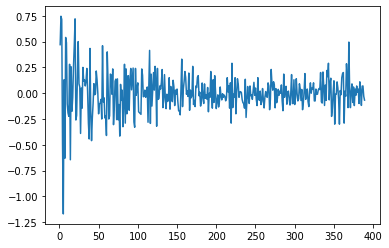

In [ ]:
data['Close First Difference'].dropna().plot()

In [ ]:
# data.to_csv(r"C:\Users\konark.yadav\Downloads\data.csv", index=False)
data['Seasonal Difference'] = data['Close'] - data['Close'].shift(12)

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import matplotlib.pyplot as plt
 
%matplotlib inline

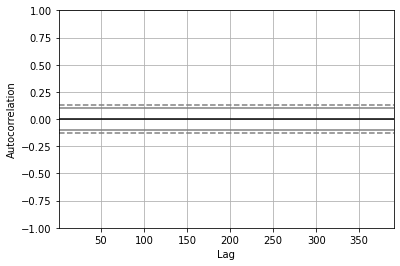

In [ ]:
# from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(data['Close'])
plt.show()

In [ ]:
adfuller_test(data['Seasonal Difference'].dropna())

ADF Test Statistic : -4.02084681739926
p-value : 0.0013052001881889703
#Lags used : 12
Number of observations used : 363
Strong evidence against Null Hypothesis-H0. Reject the Null Hypothesis. Data has no unit root and is stationary


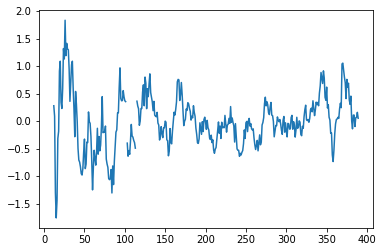

In [ ]:
data['Seasonal Difference'].plot()

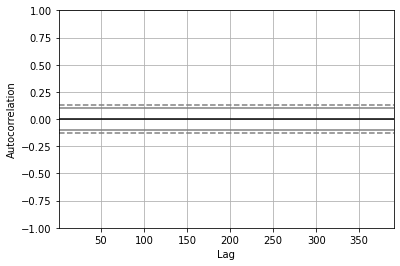

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Close'])
plt.show()

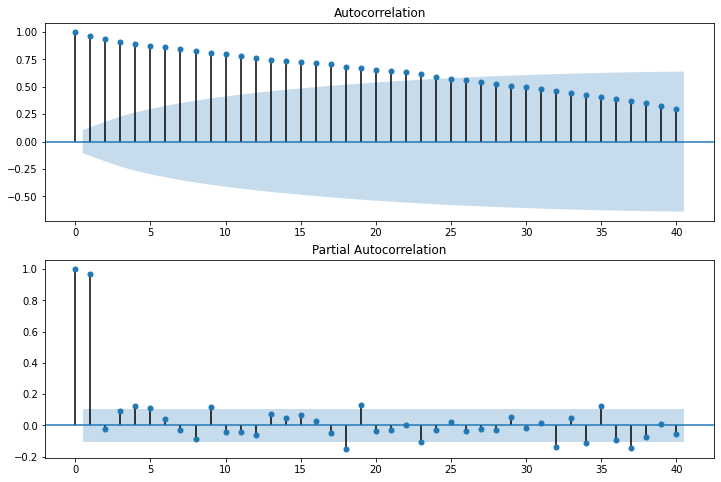

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train,lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
X = data['Close'].dropna().values
size = int(len(X) -50)
train, test = X[0:size], X[size:len(X)]

In [ ]:
# print(data)

In [ ]:
# train
model_arima = ARIMA(train, order = (2,1,1))
model_fit = model_arima.fit()

In [ ]:
predictions=model_fit.forecast(len(test))[0]
stop_arima = time.time()

In [ ]:
len(test)

50

In [ ]:
from sklearn.metrics import mean_squared_error
error = math.sqrt(mean_squared_error(test, model_fit.forecast(len(test))[0]))
print('Test RMSE: %.3f' % error)

Test RMSE: 0.867


In [ ]:
time_arima=stop_arima - start_arima
print(time_arima)

1.7368195056915283


In [ ]:
# history = [x for x in train]
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# predictions = list()
# for t in range(len(test)):
#     model = ARIMA(history, order=(2,1,1))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# error = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % error)
# # plot
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

In [ ]:
from sklearn.metrics import r2_score
cod_arima = r2_score(test, predictions)
print(cod_arima)

-4.62110424388761


In [ ]:
arima_pred_df = pd.DataFrame({'Arima Predictions':predictions})
valid['Arima']=arima_pred_df['Arima Predictions']

In [ ]:
# valid
# valid.to_csv('valid_df.csv')

In [ ]:
import matplotlib.pyplot as plt

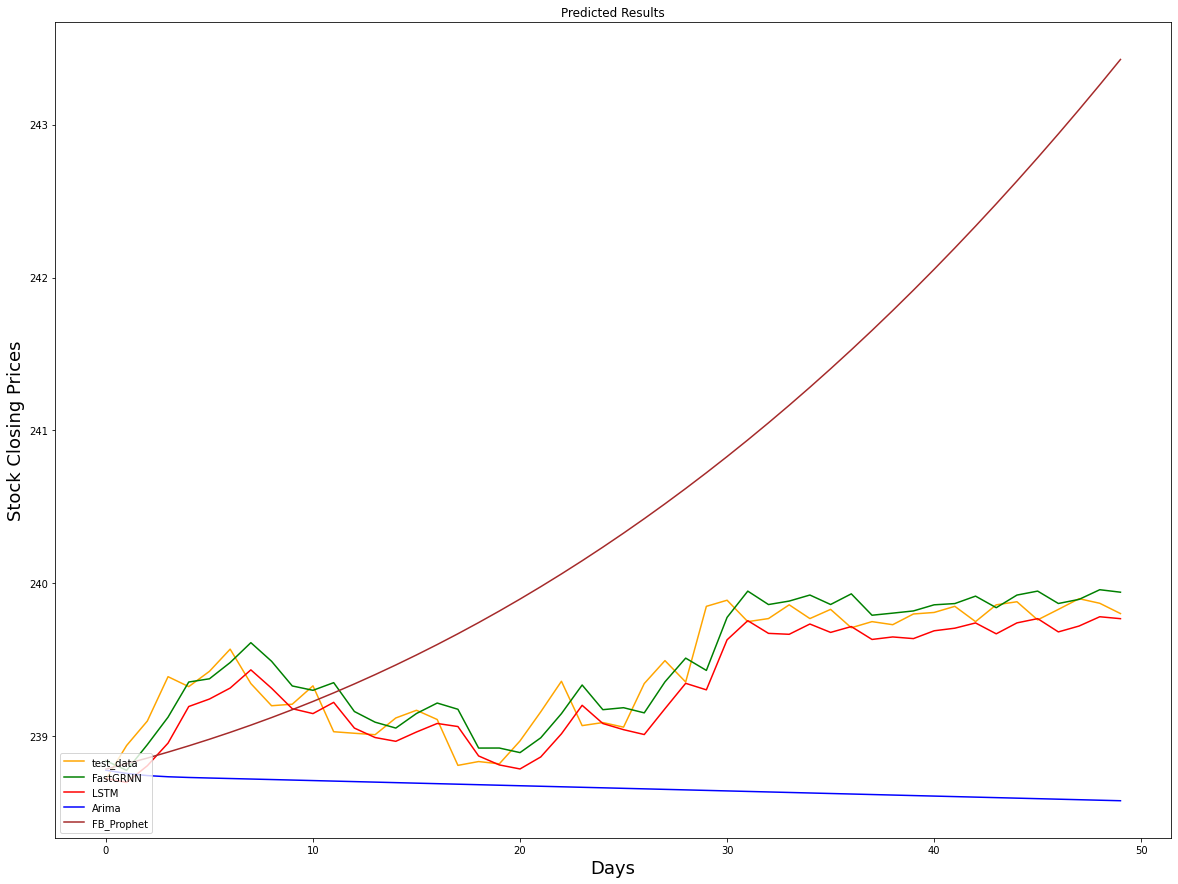

In [ ]:
#Visualize the data
plt.figure(figsize=(20,15))
plt.title('Predicted Results')
plt.xlabel('Days', fontsize=18)
plt.ylabel("Stock Closing Prices", fontsize=18)
# plt.plot(train['Close'], color='green')
 
 
plt.plot(valid[['Close']], color= 'orange', label='test_data')
plt.plot(valid[['FastGRNN']],color = 'green',label='FastGRNN')
plt.plot(valid[['LSTM']],color = 'red',label='LSTM')
plt.plot(valid[['Arima']],color = 'blue',label='Arima')
plt.plot(valid[['FB_Prophet']],color = 'brown',label='FB_Prophet')
 
plt.legend( loc='lower left')
plt.savefig('plot_predicted.png')

In [ ]:

print('Arima MSE: %.3f' % error)
print("RMSE for FASTRNN,LSMT,FB_Prophet:")
print(rmse_fastgrnn)
print(rmse_lstm_1)
print(rmse_fb)


Arima MSE: 0.867
RMSE for FASTRNN,LSMT,FB_Prophet:
0.16037204461483348
0.1871492551793879
1.5905083620842124


In [ ]:
print(time_lstm_1)
print(time_fastrnn)
print(time_fb)

14.007461071014404
3.44767165184021
0.4051656723022461


In [ ]:
################CNN + LSTM + BiLSTM############################
df = data_1
data_2 = df.filter(['Close'])
len(data_2)

data_2 = data_2[data_2['Close'].notna()]
len(data_2)

389

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
#Converting the dataframe to a numpy array
dataset = data_2.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) -50) 
# training_data_len = math.ceil( len(dataset) *.6)




#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(10,len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])


#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)    


#Reshape the data into the shape accepted by the CNN + BiLSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 10: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])



#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the CNN + BiLSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(329, 10, 1)
(50, 10, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Bidirectional
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
#Build the LSTM network model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model_cnn_lstm.add(Conv1D(filters=50, kernel_size=3, padding='same', activation='relu'))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
# model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
model_cnn_lstm.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model_cnn_lstm.add(Dropout(0.5))

model_cnn_lstm.add(Dense(units=25))
model_cnn_lstm.add(Dense(units=1))


#Compile the model
model_cnn_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
start_lstm = time.time()
 
#Train the model
model_cnn_lstm.fit(x_train, y_train, batch_size=10, epochs=40) 
 
stop_lstm = time.time()
print(f"Training time: {stop_lstm - start_lstm}s")

Epoch 1/40
329/329 [==============================] - 1s 4ms/step - loss: 0.0307
Epoch 2/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 3/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 4/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 5/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 6/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 7/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 8/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 9/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 10/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 11/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 12/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 13/40
329/329 [====

In [ ]:
time_CNN_LSTM_BiLSTM= stop_lstm - start_lstm
print(time_CNN_LSTM_BiLSTM)

17.520658493041992


In [ ]:
#Getting the models predicted price values
predictions_CNN_LSTM_BiLSTM = model_cnn_lstm.predict(x_test) 
predictions_CNN_LSTM_BiLSTM = scaler.inverse_transform(predictions_CNN_LSTM_BiLSTM)#Undo scaling

#Calculate/Get the value of RMSE
rmse_CNN_LSTM_BiLSTM=np.sqrt(np.mean(((predictions_CNN_LSTM_BiLSTM- y_test)**2)))
print(rmse_CNN_LSTM_BiLSTM)

0.19898068148469128


In [ ]:
cod_CNN_LSTM_BiLSTM= r2_score(y_test, predictions_CNN_LSTM_BiLSTM)
print(cod_CNN_LSTM_BiLSTM)

0.7036804379434998


## FastRNN+ Above model

In [ ]:
import tensorflow.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [ ]:
#Import keras grnn
from rnn import FastGRNNCellKeras, FastRNNCellKeras

In [ ]:


y = inputs = Input(shape=[int(dataDimension / inputDims), inputDims], name='input')
layer_shape = K.int_shape(y)#x.get_shape()
# print(layer_shape)
# x = RNN(FastCell, return_sequences=False, name='rnn')(x)
# #x = RNN(FastCell_1, return_sequences=True, name='rnn1')(x)


# out = Dense(1, activation='relu', name='dense')(x)
# model = Model(inputs=inputs, outputs=out)
# Adam_ = Adam(lr=0.001)
# # model.compile(optimizer=Adam_, loss='mean_squared_error', metrics=['accuracy'])
# model.compile(optimizer=Adam_, loss='mean_squared_error', metrics=['accuracy'])

#Build the LSTM network model
y = RNN(FastCell, return_sequences=True, name='rnn')(y)
# LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1))
y= Conv1D(filters=300, kernel_size=3 , padding='same', activation='relu', name='Conv1D')(y)

y= MaxPooling1D(pool_size=1,name='MaxPooling1D')(y)
# model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
y= Bidirectional(LSTM(units=50, return_sequences=False))(y)
# y= Dropout(0.5)(y)

y= Dense(units=25)(y)
out= Dense(units=1)(y)
model_fastrnn_hyb = Model(inputs=inputs, outputs=out)




# #Build the LSTM network model

# model_cnn_lstm.add(RNN(FastCell,  return_sequences=True,input_shape=(x_train.shape[1],1)))
# model_cnn_lstm.add(Conv1D(filters=50, kernel_size=3, padding='same', activation='relu'))
# model_cnn_lstm.add(MaxPooling1D(pool_size=2))
# # model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
# model_cnn_lstm.add(Bidirectional(LSTM(units=50, return_sequences=False)))
# model_cnn_lstm.add(Dropout(0.5))

# model_cnn_lstm.add(Dense(units=25))
# model_cnn_lstm.add(Dense(units=1))


#Compile the model
model_fastrnn_hyb.compile(optimizer=Adam_, loss='mean_squared_error')
# model_cnn_lstm.compile(optimizer='Adam_', loss='mean_squared_error', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
print(x_train.shape)
x_train = np.reshape(x_train,[x_train.shape[0],1,10])
print(x_test.shape)
x_test = np.reshape(x_test,[x_test.shape[0],1,10])
print(x_train.shape)
print(x_test.shape)

(329, 10, 1)
(50, 10, 1)
(329, 1, 10)
(50, 1, 10)


In [ ]:
csv_logger_fast_hybrid = CSVLogger("model_history_log_fast_hybrid.csv", append=True)


In [ ]:
start = time.time()
model_fastrnn_hyb.fit(x_train, y_train, batchSize, epochs=totalEpochs, validation_data=(x_test, scaled_data[training_data_len : , : ]),callbacks=[csv_logger_fast_hybrid])
stop = time.time()
print(f"Training time: {stop - start}s")

Train on 329 samples, validate on 50 samples
Epoch 1/40
329/329 [==============================] - 2s 8ms/sample - loss: 0.1016 - val_loss: 0.0041
Epoch 2/40
329/329 [==============================] - 0s 818us/sample - loss: 0.0070 - val_loss: 0.0051
Epoch 3/40
329/329 [==============================] - 0s 861us/sample - loss: 0.0040 - val_loss: 0.0059
Epoch 4/40
329/329 [==============================] - 0s 763us/sample - loss: 0.0043 - val_loss: 0.0041
Epoch 5/40
329/329 [==============================] - 0s 725us/sample - loss: 0.0042 - val_loss: 0.0056
Epoch 6/40
329/329 [==============================] - 0s 857us/sample - loss: 0.0049 - val_loss: 0.0047
Epoch 7/40
329/329 [==============================] - 0s 870us/sample - loss: 0.0047 - val_loss: 0.0026
Epoch 8/40
329/329 [==============================] - 0s 826us/sample - loss: 0.0039 - val_loss: 0.0028
Epoch 9/40
329/329 [==============================] - 0s 787us/sample - loss: 0.0030 - val_loss: 0.0024
Epoch 10/40
329/329 [

In [ ]:
performance_log_fast_hybrid=pd.read_csv('model_history_log_fast_hybrid.csv')
# print(performance_log_fastrnn)
# del performance_log_lstm['acc']
# del performance_log_lstm['val_acc']
# del performance_log_fast_hybrid['val_loss']
# print(performance_log_fast_hybrid)

In [ ]:
time_fastrnn_hyb_CNN_BiLSTM= stop - start
print(time_fastrnn_hyb_CNN_BiLSTM)

14.16171407699585


In [ ]:
#Getting the models predicted price values
predictions_fastrnn_hyb_CNN_BiLSTM = model_fastrnn_hyb.predict(x_test) 
predictions_fastrnn_hyb_CNN_BiLSTM = scaler.inverse_transform(predictions_fastrnn_hyb_CNN_BiLSTM)#Undo scaling

#Calculate/Get the value of RMSE
rmse_fastrnn_hyb_CNN_BiLSTM=np.sqrt(np.mean(((predictions_fastrnn_hyb_CNN_BiLSTM- y_test)**2)))
print(rmse_fastrnn_hyb_CNN_BiLSTM)

0.1713269186162242


In [ ]:
cod_fastrnn_hyb_CNN_BiLSTM = r2_score(y_test, predictions_fastrnn_hyb_CNN_BiLSTM) 
print(cod_fastrnn_hyb_CNN_BiLSTM)

0.7803204130835634


## Plot for Training FastRNN, LSTM, Fast_Hybrid

In [ ]:
# len(predictions_fastrnn_hyb_CNN_BiLSTM)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')

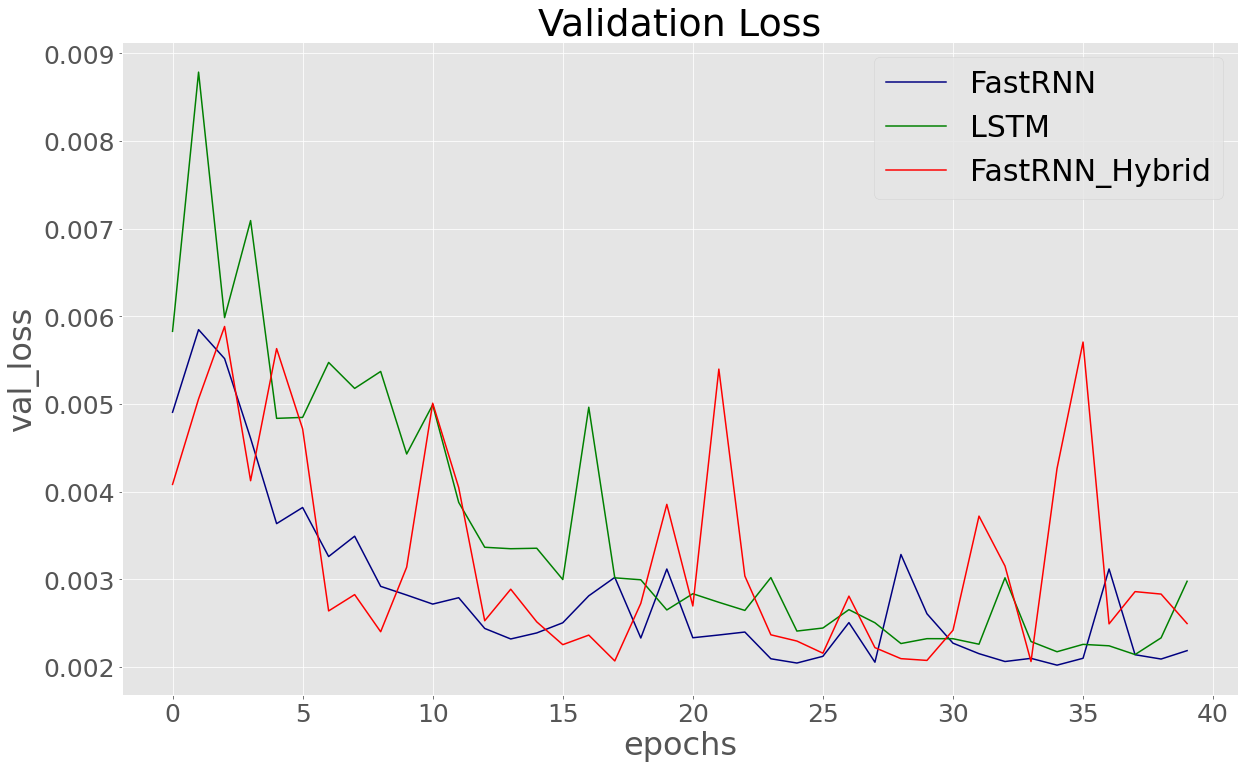

In [ ]:
#Visualize the data
plt.figure(figsize=(20,12))
plt.title('Validation Loss',fontsize= 38)
plt.xlabel('epochs', fontsize=32)
plt.ylabel("val_loss", fontsize=32)
# plt.plot(train['Close'], color='green')
 
 
plt.plot(performance_log_fastrnn['val_loss'], color= 'navy', label='FastRNN')
plt.plot(performance_log_lstm['val_loss'],color = 'green',label='LSTM')
plt.plot(performance_log_fast_hybrid['val_loss'],color = 'red',label='FastRNN_Hybrid')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
 
plt.legend( loc='upper right',prop={'size': 30})
plt.savefig('val_loss.png')

In [ ]:
plt.style.use('fivethirtyeight')
# labels = performance_log_fastrnn['epoch']
test= y_test[:-30]
FastRNN = predictions_fastgrnn[:-30]
LSTM = predictions_lstm[:-30]
FastRNN_hybrid = predictions_fastrnn_hyb_CNN_BiLSTM[:-30]
x=0
# set width of bar
barWidth = 0.20

In [ ]:
# len(test)

In [ ]:
 
# # set height of bar
# bars1 = [12, 30, 1, 8, 22]
# bars2 = [28, 6, 16, 5, 10]
# bars3 = [29, 3, 24, 25, 17]
# Set position of bar on X axis
r1 = list(np.arange(len(test)))
r2 = [x + barWidth for x in r1]
# r2 = np.array(r2)
r3 = [x + barWidth for x in r2]
# r3 = np.array(r3)
r4 = [x + barWidth for x in r3]
# r4 = np.array(r4)

In [ ]:
test_list = [i[0] for i in test.tolist()]
FastRNN_list = [i[0] for i in FastRNN.tolist()]
LSTM_list = [i[0] for i in LSTM.tolist()]
FastRNN_hybrid_list = [i[0] for i in FastRNN_hybrid .tolist()]

In [ ]:
print(test_list)

[238.7200927734375, 238.94000244140625, 239.1000061035156, 239.38999938964844, 239.3249969482422, 239.4250030517578, 239.57000732421875, 239.34500122070312, 239.1999969482422, 239.2100067138672, 239.3300018310547, 239.02999877929688, 239.0200042724609, 239.01060485839844, 239.1199951171875, 239.17030334472656, 239.1100006103516, 238.80999755859372, 238.8350067138672, 238.82000732421875]


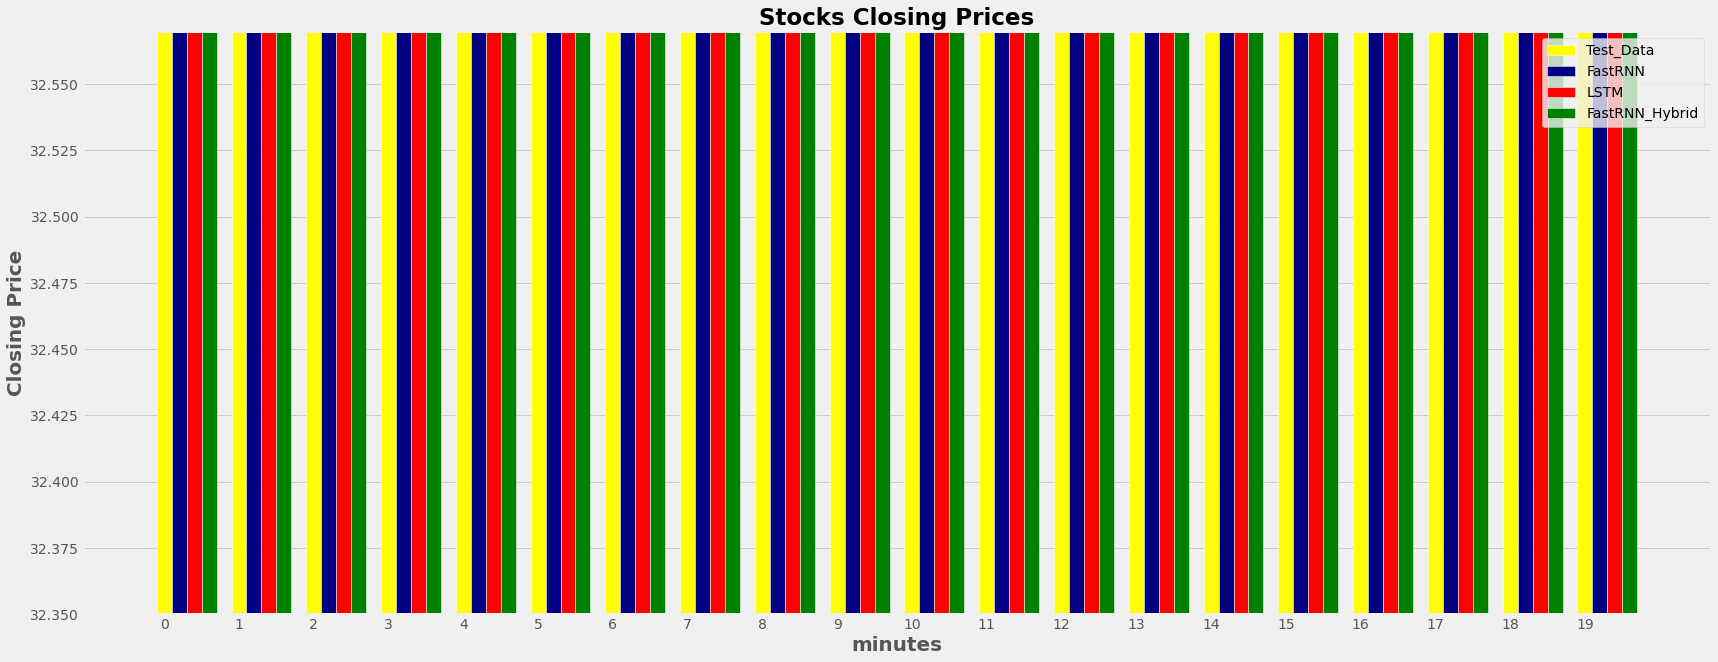

In [ ]:
# Make the plot
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(26,10)) 
plt.bar(r1, test_list, color='yellow', width=barWidth, edgecolor='white', label='Test_Data')
plt.bar(r2, FastRNN_list, color='navy', width=barWidth, edgecolor='white', label='FastRNN')
plt.bar(r3, LSTM_list, color='red', width=barWidth, edgecolor='white', label='LSTM')
plt.bar(r4, FastRNN_hybrid_list, color='green', width=barWidth, edgecolor='white', label='FastRNN_Hybrid')


axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([32.35,32.57]) #Change value as per need

# Add xticks on the middle of the group bars
plt.title('Stocks Closing Prices', fontweight='bold',fontsize=23)
plt.xlabel('minutes', fontweight='bold',fontsize=20)
plt.xticks([r for r in range(0,len(FastRNN_list))])
# plt.xticks(len(test))
plt.ylabel('Closing Price', fontweight='bold',fontsize=20)


# Create legend & Show graphic
plt.legend()
plt.show()



In [ ]:
# Make the plot
plt.style.use('fivethirtyeight')
fig = plt.subplots( figsize=(30, 30))
sub1 = plt.subplot(2, 2, 1)
# axes[0]plt.subplots(1,1,figsize=(26,10)) 
sub1.bar(r1, test_list, color='yellow', width=barWidth, edgecolor='white', label='Test_Data')
sub1.bar(r2, FastRNN_list, color='navy', width=barWidth, edgecolor='white', label='FastRNN')
sub1.bar(r3, LSTM_list, color='red', width=barWidth, edgecolor='white', label='LSTM')
sub1.bar(r4, FastRNN_hybrid_list, color='green', width=barWidth, edgecolor='white', label='FastRNN_Hybrid')



axes_1 = plt.gca()
# axes.set_xlim([xmin,xmax])
sub1.set_ylim([32.35,32.57]) #Change value as per need

# Add xticks on the middle of the group bars
sub1.set_title('Stocks Closing Prices', fontweight='bold')
sub1.set_xlabel('minutes', fontweight='bold')
sub1.set_xticks([r for r in range(0,len(FastRNN_list))])
# plt.xticks(len(test))
sub1.set_ylabel('Closing Price', fontweight='bold')

############################################################################################ 2

sub2 = plt.subplot(2, 2, 2)
# axes[0]plt.subplots(1,1,figsize=(26,10)) 
sub2.bar(r1, test_list, color='yellow', width=barWidth, edgecolor='white', label='Test_Data')
sub2.bar(r2, FastRNN_list, color='navy', width=barWidth, edgecolor='white', label='FastRNN')
sub2.bar(r3, LSTM_list, color='red', width=barWidth, edgecolor='white', label='LSTM')
sub2.bar(r4, FastRNN_hybrid_list, color='green', width=barWidth, edgecolor='white', label='FastRNN_Hybrid')



# axes_1 = plt.gca()
# axes.set_xlim([xmin,xmax])
sub2.set_ylim([30.35,33.57]) #Change value as per need

# Add xticks on the middle of the group bars
sub2.set_title('Stocks Closing Prices', fontweight='bold')
sub2.set_xlabel('minutes', fontweight='bold')
sub2.set_xticks([r for r in range(0,len(FastRNN_list))])
# plt.xticks(len(test))
sub2.set_ylabel('Closing Price', fontweight='bold')


######################################################################################## 3
sub3 = plt.subplot(2, 2, 4)
# axes[0]plt.subplots(1,1,figsize=(26,10)) 
sub3.bar(r1, test_list, color='yellow', width=barWidth, edgecolor='white', label='Test_Data')
sub3.bar(r2, FastRNN_list, color='navy', width=barWidth, edgecolor='white', label='FastRNN')
sub3.bar(r3, LSTM_list, color='red', width=barWidth, edgecolor='white', label='LSTM')
sub3.bar(r4, FastRNN_hybrid_list, color='green', width=barWidth, edgecolor='white', label='FastRNN_Hybrid')



# axes_1 = plt.gca()
# axes.set_xlim([xmin,xmax])
sub3.set_ylim([20.35,33.57]) #Change value as per need

# Add xticks on the middle of the group bars
sub3.set_title('Stocks Closing Prices', fontweight='bold')
sub3.set_xlabel('minutes', fontweight='bold')
sub3.set_xticks([r for r in range(0,len(FastRNN_list))])
# plt.xticks(len(test))
sub3.set_ylabel('Closing Price', fontweight='bold')


#########################################################
# fig.tight_layout()
plt.show()

# Create legend & Show graphic
# plt_1.legend()

# plt.plot()



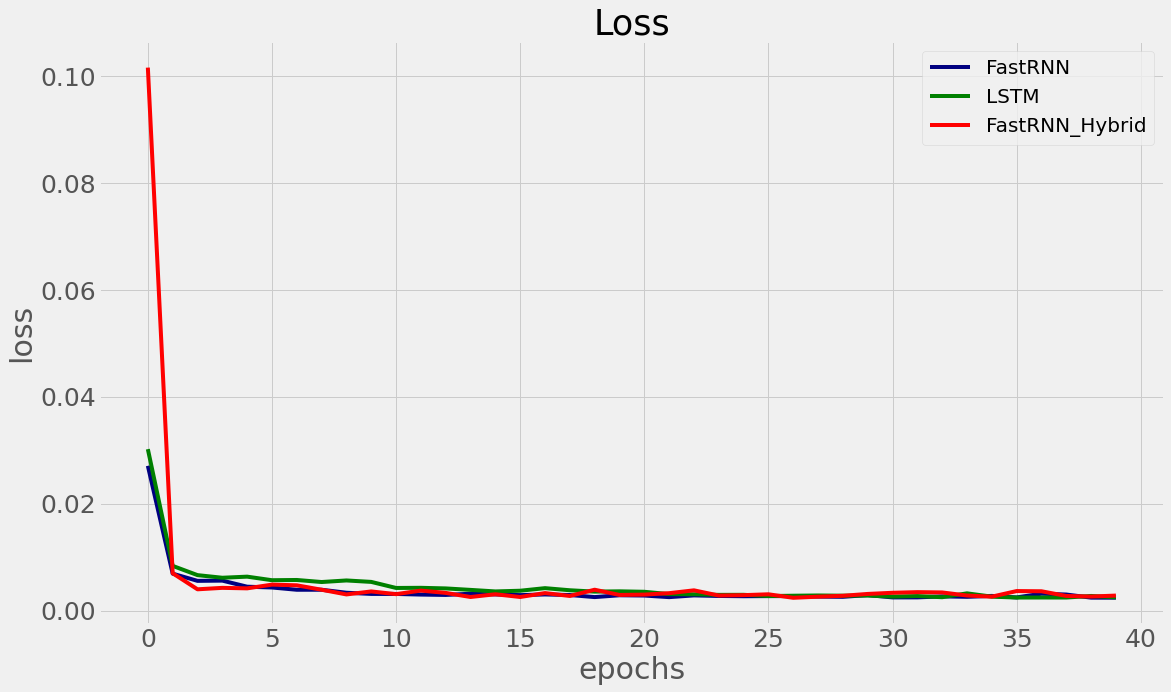

In [ ]:
#Visualize the data
plt.figure(figsize=(17,10))
plt.title('Loss',fontsize= 35)
plt.xlabel('epochs', fontsize=30)
plt.ylabel("loss", fontsize=30)
# plt.plot(train['Close'], color='green')
 
 
plt.plot(performance_log_fastrnn['loss'], color= 'navy', label='FastRNN')
plt.plot(performance_log_lstm['loss'],color = 'green',label='LSTM')
plt.plot(performance_log_fast_hybrid['loss'],color = 'red',label='FastRNN_Hybrid')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
 
plt.legend( loc='upper right',prop={'size': 20})
plt.savefig('loss.png')

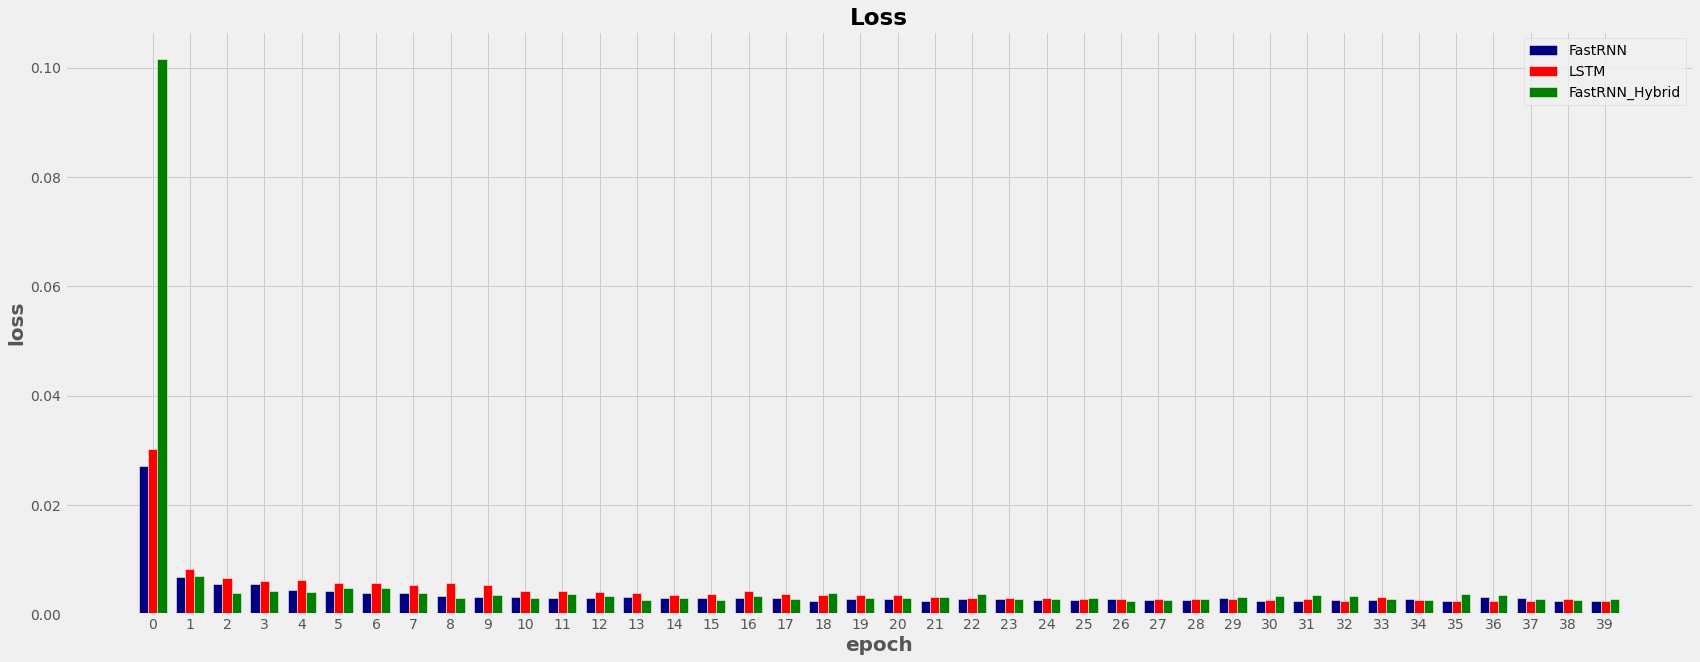

In [ ]:
plt.style.use('fivethirtyeight')
labels = performance_log_fastrnn['epoch']
FastRNN = performance_log_fastrnn['loss']
LSTM = performance_log_lstm['loss']
FastRNN_hybrid = performance_log_fast_hybrid['loss']
x=0

# set width of bar
barWidth = 0.25
 
# # set height of bar
# bars1 = [12, 30, 1, 8, 22]
# bars2 = [28, 6, 16, 5, 10]
# bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(FastRNN))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot

plt.subplots(figsize=(26,10)) 
plt.bar(r1, FastRNN, color='navy', width=barWidth, edgecolor='white', label='FastRNN')
plt.bar(r2, LSTM, color='red', width=barWidth, edgecolor='white', label='LSTM')
plt.bar(r3, FastRNN_hybrid, color='green', width=barWidth, edgecolor='white', label='FastRNN_Hybrid')
 
# Add xticks on the middle of the group bars
plt.title('Loss', fontweight='bold',fontsize=23)
plt.xlabel('epoch', fontweight='bold',fontsize=20)
plt.xticks([r + barWidth for r in range(len(FastRNN))], labels)
plt.ylabel('loss', fontweight='bold',fontsize=20)


# Create legend & Show graphic
plt.legend()
plt.show()


# # x = np.arange(len(labels))  # the label locations
# width = 0.30  # the width of the bars
# r1 = np.arange(len(labels))
# r2 = [x + width for x in r1]
# r3 = [x + width for x in r2]



# fig, ax = plt.subplots(figsize=(18,8))
# rects1 = ax.bar(r1, FastRNN, width, label='FastRNN')
# rects2 = ax.bar(r2, LSTM, width, label='LSTM')
# rects3 = ax.bar(r3, FastRNN_hybrid, width, label='FastRNN_Hybrid')



# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Loss')
# ax.set_title('Loss by model')
# ax.set_xticks(x)
# # ax.set_xticks(rotation=90)

# ax.set_xticklabels(labels)
# ax.legend()


# # fig.tight_layout()

# plt.show()

In [ ]:
# predictions_lstm

In [ ]:
#####################CNN + BiLSTM + Attention Mechanism
import os
import re

import numpy as np
import pandas as pd
import tensorflow as tf
import keras.backend as K
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras.layers import *
from keras.models import Model


In [ ]:
df = data_1
data_2 = df.filter(['Close'])
len(data_2)

data_2 = data_2[data_2['Close'].notna()]
len(data_2)

import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
#Converting the dataframe to a numpy array
dataset = data_2.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) -50) 
# training_data_len = math.ceil( len(dataset) *.6)




#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(10,len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])


#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)    


#Reshape the data into the shape accepted by the CNN + Attention + BiLSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#Test data set
test_data = scaled_data[training_data_len - 10: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])



#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the CNN + Attention + BiLSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
pip install keras-self-attention

In [ ]:
import keras
from keras_self_attention import SeqSelfAttention

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Bidirectional
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D


from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

#Build the LSTM network model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model_cnn_lstm.add(SeqSelfAttention(attention_activation='sigmoid'))
model_cnn_lstm.add(Conv1D(filters=50, kernel_size=3, padding='same', activation='relu'))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
# model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
model_cnn_lstm.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model_cnn_lstm.add(Dropout(0.5))

model_cnn_lstm.add(Dense(units=25))
model_cnn_lstm.add(Dense(units=1))


#Compile the model
model_cnn_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
    


In [ ]:
start_lstm = time.time()
 
#Train the model
model_cnn_lstm.fit(x_train, y_train, batch_size=10, epochs=40) 
 
stop_lstm = time.time()
print(f"Training time: {stop_lstm - start_lstm}s")
time_CNN_BiLSTM_Attention_Mechanism= stop_lstm-start_lstm

Epoch 1/40
329/329 [==============================] - 2s 6ms/step - loss: 0.0396
Epoch 2/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 3/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 4/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 5/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 6/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 7/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 8/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 9/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 10/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 11/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 12/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 13/40
329/329 [====

In [ ]:
#Getting the models predicted price values
predictions_CNN_BiLSTM_Attention_Mechanism = model_cnn_lstm.predict(x_test) 
predictions_CNN_BiLSTM_Attention_Mechanism = scaler.inverse_transform(predictions_CNN_BiLSTM_Attention_Mechanism)#Undo scaling

#Calculate/Get the value of RMSE
rmse_CNN_BiLSTM_Attention_Mechanism=np.sqrt(np.mean(((predictions_CNN_BiLSTM_Attention_Mechanism- y_test)**2)))
print(rmse_CNN_BiLSTM_Attention_Mechanism)

0.22215487376595852


In [ ]:
cod_CNN_BiLSTM_Attention_Mechanism = r2_score(y_test, predictions_CNN_BiLSTM_Attention_Mechanism) 
print(cod_CNN_BiLSTM_Attention_Mechanism)

0.6306397238434731


In [ ]:
df = data_1
data_2 = df.filter(['Close'])
len(data_2)

data_2 = data_2[data_2['Close'].notna()]
len(data_2)

import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
#Converting the dataframe to a numpy array
dataset = data_2.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) -50) 
# training_data_len = math.ceil( len(dataset) *.6)




#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(10,len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])


#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)    


#Reshape the data into the shape accepted by the CNN + Attention + BiLSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#Test data set
test_data = scaled_data[training_data_len - 10: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])



#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Reshape the data into the shape accepted by the CNN + Attention + BiLSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# CNN + Attention Bi-LSTM network model
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Bidirectional
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D


from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

#Build the CNN + Attention Bi-LSTM network model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Bidirectional(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1))))
# model_cnn_lstm.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model_cnn_lstm.add(SeqSelfAttention(attention_activation='sigmoid'))
model_cnn_lstm.add(Conv1D(filters=50, kernel_size=3, padding='same', activation='relu'))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(Bidirectional(LSTM(units=50, return_sequences=False)))
# model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
# model_cnn_lstm.add(Bidirectional(LSTM(units=50, return_sequences=False)))

model_cnn_lstm.add(Dropout(0.5))

model_cnn_lstm.add(Dense(units=25))
model_cnn_lstm.add(Dense(units=1))


#Compile the model
model_cnn_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
start_lstm = time.time()
 
#Train the model
model_cnn_lstm.fit(x_train, y_train, batch_size=10, epochs=40) 
 
stop_lstm = time.time()
print(f"Training time: {stop_lstm - start_lstm}s")
time_CNN_Attention_Bi_LSTM=stop_lstm- start_lstm

Epoch 1/40
329/329 [==============================] - 2s 7ms/step - loss: 0.0380
Epoch 2/40
329/329 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 3/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 4/40
329/329 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 5/40
329/329 [==============================] - 1s 2ms/step - loss: 0.0115
Epoch 6/40
329/329 [==============================] - 1s 2ms/step - loss: 0.0084
Epoch 7/40
329/329 [==============================] - 1s 2ms/step - loss: 0.0086
Epoch 8/40
329/329 [==============================] - 1s 2ms/step - loss: 0.0076
Epoch 9/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 10/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 11/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 12/40
329/329 [==============================] - 1s 2ms/step - loss: 0.0085
Epoch 13/40
329/329 [====

In [ ]:
#Getting the models predicted price values
predictions_CNN_Attention_Bi_LSTM = model_cnn_lstm.predict(x_test) 
predictions_CNN_Attention_Bi_LSTM = scaler.inverse_transform(predictions_CNN_Attention_Bi_LSTM)#Undo scaling

#Calculate/Get the value of RMSE
rmse_CNN_Attention_Bi_LSTM=np.sqrt(np.mean(((predictions_CNN_Attention_Bi_LSTM - y_test)**2)))
print(rmse_CNN_Attention_Bi_LSTM)

0.26834072229716316


In [ ]:
cod_CNN_Attention_Bi_LSTM = r2_score(y_test, predictions_CNN_Attention_Bi_LSTM) 
print(cod_CNN_Attention_Bi_LSTM)

0.46109568110353105


In [ ]:
# LSTM + Attention + CNN + LSTM network model
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Bidirectional
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D


from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

#Build the CNN + Attention Bi-LSTM network model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
# model_cnn_lstm.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model_cnn_lstm.add(SeqSelfAttention(attention_activation='sigmoid'))
model_cnn_lstm.add(Conv1D(filters=50, kernel_size=3, padding='same', activation='relu'))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
# model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
# model_cnn_lstm.add(Bidirectional(LSTM(units=50, return_sequences=False)))

model_cnn_lstm.add(Dropout(0.5))

model_cnn_lstm.add(Dense(units=25))
model_cnn_lstm.add(Dense(units=1))


#Compile the model
model_cnn_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
start_lstm = time.time()
 
#Train the model
model_cnn_lstm.fit(x_train, y_train, batch_size=10, epochs=40) 
 
stop_lstm = time.time()
print(f"Training time: {stop_lstm - start_lstm}s")
time_LSTM_Attention_CNN_LSTM= stop_lstm-start_lstm

Epoch 1/40
329/329 [==============================] - 2s 6ms/step - loss: 0.0348
Epoch 2/40
329/329 [==============================] - 0s 938us/step - loss: 0.0128
Epoch 3/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 4/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 5/40
329/329 [==============================] - 0s 977us/step - loss: 0.0104
Epoch 6/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 7/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 8/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 9/40
329/329 [==============================] - 0s 994us/step - loss: 0.0103
Epoch 10/40
329/329 [==============================] - 0s 981us/step - loss: 0.0091
Epoch 11/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 12/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 13/40
329/3

In [ ]:
#Getting the models predicted price values
predictions_LSTM_Attention_CNN_LSTM = model_cnn_lstm.predict(x_test) 
predictions_LSTM_Attention_CNN_LSTM = scaler.inverse_transform(predictions_LSTM_Attention_CNN_LSTM)#Undo scaling

#Calculate/Get the value of RMSE
rmse_LSTM_Attention_CNN_LSTM=np.sqrt(np.mean(((predictions_LSTM_Attention_CNN_LSTM- y_test)**2)))
print(rmse_LSTM_Attention_CNN_LSTM)

0.2401797530446178


In [ ]:
cod_LSTM_Attention_CNN_LSTM = r2_score(y_test, predictions_LSTM_Attention_CNN_LSTM) 
print(cod_LSTM_Attention_CNN_LSTM)

0.5682709391763147


In [ ]:
# Attention LSTM network model
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Bidirectional
from keras.layers import Dense, Input, CuDNNLSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D


from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

#Build the CNN + Attention Bi-LSTM network model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
# model_cnn_lstm.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model_cnn_lstm.add(SeqSelfAttention(attention_activation='sigmoid'))
# model_cnn_lstm.add(Conv1D(filters=50, kernel_size=3, padding='same', activation='relu'))
# model_cnn_lstm.add(MaxPooling1D(pool_size=2))
# model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
# model_cnn_lstm.add(Bidirectional(LSTM(units=50, return_sequences=False)))

model_cnn_lstm.add(Dropout(0.5))

model_cnn_lstm.add(Dense(units=25))
model_cnn_lstm.add(Dense(units=1))


#Compile the model
model_cnn_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
start_lstm = time.time()
 
#Train the model
model_cnn_lstm.fit(x_train, y_train, batch_size=10, epochs=40) 
 
stop_lstm = time.time()
print(f"Training time: {stop_lstm - start_lstm}s")
time_Attention_LSTM=stop_lstm-start_lstm

Epoch 1/40
329/329 [==============================] - 2s 6ms/step - loss: 0.0435
Epoch 2/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 3/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 4/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 5/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 6/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 7/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 8/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 9/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 10/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 11/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 12/40
329/329 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 13/40
329/329 [====

In [ ]:
#Getting the models predicted price values
predictions_Attention_LSTM = model_cnn_lstm.predict(x_test) 
predictions_Attention_LSTM = scaler.inverse_transform(predictions_Attention_LSTM)#Undo scaling

#Calculate/Get the value of RMSE
rmse_Attention_LSTM=np.sqrt(np.mean(((predictions_Attention_LSTM- y_test)**2)))
print(rmse_Attention_LSTM)

0.2913853247664958


In [ ]:
cod_Attention_LSTM = r2_score(y_test, predictions_Attention_LSTM) 
print(cod_Attention_LSTM)

0.3645610295240369


In [ ]:
##############CNN + LSTM#################
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=50, kernel_size=3, padding='same', activation='relu',input_shape=(x_train.shape[1],1)))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(LSTM(units=50, return_sequences=True))
# model_cnn_lstm.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model_cnn_lstm.add(SeqSelfAttention(attention_activation='sigmoid'))
# model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
# model_cnn_lstm.add(Bidirectional(LSTM(units=50, return_sequences=False)))

model_cnn_lstm.add(Dropout(0.5))

model_cnn_lstm.add(Dense(units=25))
model_cnn_lstm.add(Dense(units=1))


#Compile the model
model_cnn_lstm.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
start_lstm = time.time()
 
#Train the model
model_cnn_lstm.fit(x_train, y_train, batch_size=10, epochs=40) 
 
stop_lstm = time.time()
print(f"Training time: {stop_lstm - start_lstm}s")
time_CNN_LSTM=stop_lstm-start_lstm

Epoch 1/40
329/329 [==============================] - 2s 6ms/step - loss: 0.0396
Epoch 2/40
329/329 [==============================] - 0s 794us/step - loss: 0.0139
Epoch 3/40
329/329 [==============================] - 0s 895us/step - loss: 0.0123
Epoch 4/40
329/329 [==============================] - 0s 807us/step - loss: 0.0113
Epoch 5/40
329/329 [==============================] - 0s 830us/step - loss: 0.0110
Epoch 6/40
329/329 [==============================] - 0s 843us/step - loss: 0.0112
Epoch 7/40
329/329 [==============================] - 0s 908us/step - loss: 0.0112
Epoch 8/40
329/329 [==============================] - 0s 808us/step - loss: 0.0099
Epoch 9/40
329/329 [==============================] - 0s 880us/step - loss: 0.0088
Epoch 10/40
329/329 [==============================] - 0s 924us/step - loss: 0.0110
Epoch 11/40
329/329 [==============================] - 0s 867us/step - loss: 0.0090
Epoch 12/40
329/329 [==============================] - 0s 894us/step - loss: 0.0082
Epo

In [ ]:
#Getting the models predicted price values
predictions_CNN_LSTM = model_cnn_lstm.predict(x_test) 
predictions_CNN_LSTM = scaler.inverse_transform(predictions_CNN_LSTM)#Undo scaling

#Calculate/Get the value of RMSE
rmse_CNN_LSTM=np.sqrt(np.mean(((predictions_CNN_LSTM- y_test)**2)))
print(rmse_CNN_LSTM)

0.15718990803468202


In [ ]:
cod_CNN_LSTM = r2_score(y_test, predictions_CNN_LSTM) 
print(cod_CNN_LSTM)

0.8150783265279264


In [ ]:
# print(cod_fastrnn_hyb_CNN_BiLSTM)
# print(cod_arima)
# print(cod_lstm_1)

In [ ]:
df_final = pd.DataFrame(columns=['Variabel_name','RMSE','Time(in sec)','Description','R-Square value'])

In [ ]:
# print("FastRNN::                        RMSE= %.3f ,  Time= %.2f sec " %(rmse_fastgrnn, time_fastrnn))
# print("LSTM::                           RMSE= %.3f ,  Time= %.2f sec " %(rmse_lstm_1, time_lstm_1))
# print("Arima::                          RMSE= %.3f ,  Time= -" %(error))
# print("FB::                             RMSE= %.3f ,  Time= %.2f sec" %(rmse_fb , time_fb))

# print("CNN_LSTM_BiLSTM::                RMSE= %.3f ,  Time= %.2f sec \tLSTM + conv1d + maxpooling + biLSTM + Dropout + dense + dense" %(rmse_CNN_LSTM_BiLSTM,time_CNN_LSTM_BiLSTM))
# print("fastrnn_hyb_CNN_BiLSTM::         RMSE= %.3f ,  Time= %.2f sec \tFastCell + cov1D + Maxpooling(unit=1) + BiLSTM + dropout + dense + dense" %(rmse_fastrnn_hyb_CNN_BiLSTM,time_fastrnn_hyb_CNN_BiLSTM))
# print("CNN_BiLSTM_Attention_Mechanism:: RMSE= %.3f ,  Time= %.2f sec \tLSTM + SeqSelfAttention + Conv1D + MaxPooling + BiLSTM + Dropout + Dense + Dense" %(rmse_CNN_BiLSTM_Attention_Mechanism,time_CNN_BiLSTM_Attention_Mechanism))
# print("CNN_Attention_Bi_LSTM::          RMSE= %.3f ,  Time= %.2f sec \tBiLSTM + SeqSelfAttention + Conv1D + Maxpooling + Bi_LSTM + Dropout + Dense + Dense" %(rmse_CNN_Attention_Bi_LSTM,time_CNN_Attention_Bi_LSTM))
# print("LSTM_Attention_CNN_LSTM::        RMSE= %.3f ,  Time= %.2f sec \tLSTM + SeqSelfAttention + Conv1D + MaxPooling + LSTM + Dropout + Dense + Dense" %(rmse_LSTM_Attention_CNN_LSTM,time_LSTM_Attention_CNN_LSTM))
# print("Attention_LSTM::                 RMSE= %.3f ,  Time= %.2f sec \tLSTM + SeqSelfAttention + LSTM + Dropout + Dense + Dense" %(rmse_Attention_LSTM,time_Attention_LSTM))
# print("CNN_LSTM::                       RMSE= %.3f ,  Time= %.2f sec \tConv1D + Maxpooling + LSTM + SeqSelfAttention + LSTM + Dropout + Dense + Dense" %(rmse_CNN_LSTM,time_CNN_LSTM))


In [ ]:
df_final.loc[0] = pd.Series({'Variabel_name': str('FastRNN'),'RMSE':rmse_fastgrnn ,'Time(in sec)':time_fastrnn,'Description':str('-'),'R-Square value': cod_fastrnn})
df_final.loc[1] = pd.Series({'Variabel_name': str('LSTM'),'RMSE':rmse_lstm_1 ,'Time(in sec)':time_lstm_1,'Description':str('-'),'R-Square value':cod_lstm_1})
df_final.loc[2] = pd.Series({'Variabel_name': str('Arima'),'RMSE':error ,'Time(in sec)':str('-'),'Description':str('-'),'R-Square value':cod_arima})
df_final.loc[3] = pd.Series({'Variabel_name': str('FB_Prophet'),'RMSE':rmse_fb ,'Time(in sec)':time_fb,'Description':str('-'),'R-Square value':cod_fb})


df_final.loc[4] = pd.Series({'Variabel_name': str('LSTM_CNN_BiLSTM'),'RMSE':rmse_CNN_LSTM_BiLSTM ,'Time(in sec)':time_CNN_LSTM_BiLSTM,'Description':str('LSTM + conv1d + maxpooling + biLSTM + Dropout + dense + dense'),'R-Square value':cod_CNN_LSTM_BiLSTM})
df_final.loc[5] = pd.Series({'Variabel_name': str('FASTRNN_CNN_BiLSTM'),'RMSE':rmse_fastrnn_hyb_CNN_BiLSTM ,'Time(in sec)':time_fastrnn_hyb_CNN_BiLSTM,'Description':str('FastCell + cov1D + Maxpooling(unit=1) + BiLSTM + dropout + dense + dense'),'R-Square value':cod_fastrnn_hyb_CNN_BiLSTM})
df_final.loc[6] = pd.Series({'Variabel_name': str('LSTM_Attention_CNN_BiLSTM'),'RMSE':rmse_CNN_BiLSTM_Attention_Mechanism ,'Time(in sec)':time_CNN_BiLSTM_Attention_Mechanism,'Description':str('LSTM + SeqSelfAttention + Conv1D + MaxPooling + BiLSTM + Dropout + Dense + Dense'),'R-Square value':cod_CNN_BiLSTM_Attention_Mechanism})
df_final.loc[7] = pd.Series({'Variabel_name': str('BiLSTM_Attention_CNN_BiLSTM'),'RMSE':rmse_CNN_Attention_Bi_LSTM ,'Time(in sec)':time_CNN_Attention_Bi_LSTM,'Description':str('BiLSTM + SeqSelfAttention + Conv1D + Maxpooling + Bi_LSTM + Dropout + Dense + Dense'),'R-Square value':cod_CNN_Attention_Bi_LSTM})
df_final.loc[8] = pd.Series({'Variabel_name': str('LSTM_Attention_CNN_LSTM'),'RMSE':rmse_LSTM_Attention_CNN_LSTM ,'Time(in sec)':time_LSTM_Attention_CNN_LSTM,'Description':str('LSTM + SeqSelfAttention + Conv1D + MaxPooling + LSTM + Dropout + Dense + Dense'),'R-Square value':cod_LSTM_Attention_CNN_LSTM})
df_final.loc[9] = pd.Series({'Variabel_name': str('LSTM_Attention_LSTM'),'RMSE':rmse_Attention_LSTM ,'Time(in sec)':time_Attention_LSTM,'Description':str('LSTM + SeqSelfAttention + LSTM + Dropout + Dense + Dense'),'R-Square value':cod_Attention_LSTM})
df_final.loc[10] = pd.Series({'Variabel_name': str('CNN_LSTM_Attention_LSTM'),'RMSE':rmse_CNN_LSTM ,'Time(in sec)':time_CNN_LSTM,'Description':str('Conv1D + Maxpooling + LSTM + SeqSelfAttention + LSTM + Dropout + Dense + Dense'),'R-Square value':cod_CNN_LSTM})


In [ ]:
print(df_final)
df_final.to_csv('Uber_performance_results.csv', index=False)


                  Variabel_name  ...  R-Square value
0                       FastRNN  ...        0.807515
1                          LSTM  ...        0.737871
2                         Arima  ...       -4.621104
3                    FB_Prophet  ...      -17.932607
4               LSTM_CNN_BiLSTM  ...        0.703680
5            FASTRNN_CNN_BiLSTM  ...        0.780320
6     LSTM_Attention_CNN_BiLSTM  ...        0.630640
7   BiLSTM_Attention_CNN_BiLSTM  ...        0.461096
8       LSTM_Attention_CNN_LSTM  ...        0.568271
9           LSTM_Attention_LSTM  ...        0.364561
10      CNN_LSTM_Attention_LSTM  ...        0.815078

[11 rows x 5 columns]


In [ ]:
df_final

,Variabel_name,RMSE,Time(in sec),Description,R-Square value
0,FastRNN,0.160372,3.44767,-,0.807515
1,LSTM,0.187149,14.0075,-,0.737871
2,Arima,0.866646,-,-,-4.621104
3,FB_Prophet,1.590508,0.405166,-,-17.932607
4,LSTM_CNN_BiLSTM,0.198981,17.5207,LSTM + conv1d + maxpooling + biLSTM + Dropout ...,0.703680
5,FASTRNN_CNN_BiLSTM,0.171327,14.1617,FastCell + cov1D + Maxpooling(unit=1) + BiLSTM...,0.780320
6,LSTM_Attention_CNN_BiLSTM,0.222155,20.6554,LSTM + SeqSelfAttention + Conv1D + MaxPooling ...,0.630640
7,BiLSTM_Attention_CNN_BiLSTM,0.268341,26.569,BiLSTM + SeqSelfAttention + Conv1D + Maxpoolin...,0.461096
8,LSTM_Attention_CNN_LSTM,0.240180,17.9742,LSTM + SeqSelfAttention + Conv1D + MaxPooling ...,0.568271
9,LSTM_Attention_LSTM,0.291385,19.8699,LSTM + SeqSelfAttention + LSTM + Dropout + Den...,0.364561


# New Section

In [ ]:
predicted_results = pd.DataFrame(columns=['Test_Data','FastRNN'  ,'LSTM'  ,'Arima'  ,'FB_Prophet'  ,'LSTM_CNN_BiLSTM'  ,'FASTRNN_CNN_BiLSTM'  ,'LSTM_Attention_CNN_BiLSTM' ,'BiLSTM_Attention_CNN_BiLSTM'  ,'LSTM_Attention_CNN_LSTM'  ,'LSTM_Attention_LSTM'  ,'CNN_LSTM_Attention_LSTM'])



In [ ]:
predicted_results['Test_Data']=np.squeeze(y_test)
predicted_results['FastRNN']=np.squeeze(predictions_fastgrnn)
predicted_results['LSTM']=np.squeeze(predictions_lstm)
predicted_results['Arima']=np.squeeze(predictions)
predicted_results['FB_Prophet']=np.squeeze(predictions_fb)
predicted_results['LSTM_CNN_BiLSTM']  =np.squeeze(predictions_CNN_LSTM_BiLSTM)
predicted_results['FASTRNN_CNN_BiLSTM']=np.squeeze(predictions_fastrnn_hyb_CNN_BiLSTM)
predicted_results['LSTM_Attention_CNN_BiLSTM']  =np.squeeze(predictions_CNN_BiLSTM_Attention_Mechanism)
predicted_results['BiLSTM_Attention_CNN_BiLSTM']=np.squeeze(predictions_CNN_Attention_Bi_LSTM)
predicted_results['LSTM_Attention_CNN_LSTM']=np.squeeze(predictions_LSTM_Attention_CNN_LSTM)
predicted_results['LSTM_Attention_LSTM']=np.squeeze(predictions_Attention_LSTM)
predicted_results['CNN_LSTM_Attention_LSTM']=np.squeeze(predictions_CNN_LSTM)



In [ ]:
predicted_results.head()

,Test_Data,FastRNN,LSTM,Arima,FB_Prophet,LSTM_CNN_BiLSTM,FASTRNN_CNN_BiLSTM,LSTM_Attention_CNN_BiLSTM,BiLSTM_Attention_CNN_BiLSTM,LSTM_Attention_CNN_LSTM,LSTM_Attention_LSTM,CNN_LSTM_Attention_LSTM
0,238.720093,238.840240,238.724060,238.778339,238.785586,238.678497,238.726959,238.632050,238.686249,238.627594,238.651703,238.753860
1,238.940002,238.777252,238.698669,238.757139,238.820715,238.659256,238.673080,238.647049,238.682709,238.642639,238.664658,238.732513
2,239.100006,238.945633,238.807556,238.743217,238.857764,238.743103,238.829514,238.680664,238.734634,238.681061,238.695694,238.859451
3,239.389999,239.125229,238.955627,238.735539,238.896774,238.864395,238.995529,238.760437,238.819763,238.761658,238.756592,239.017380
4,239.324997,239.355057,239.194885,238.730897,238.937785,239.115417,239.241577,238.922684,238.984146,238.906891,238.862183,239.278839


In [ ]:
predicted_results.to_csv('Predicted_Values.csv', index=False)

In [ ]:
# predictions_fastgrnn
# predictions_lstm
# predictions
# predictions_fb
# predictions_CNN_LSTM_BiLSTM
# predictions_fastrnn_hyb_CNN_BiLSTM
# predictions_CNN_BiLSTM_Attention_Mechanism
# predictions_CNN_Attention_Bi_LSTM
# predictions_LSTM_Attention_CNN_LSTM
# predictions_Attention_LSTM
# predictions_CNN_LSTM